In [11]:
# Standard Imports:
import numpy as np
import matplotlib.pyplot as plt

# Seaborn IMO provides on of the best styles out there
import seaborn as sns

# customly written by me (Werner Dobrautz)
# sets some style default (font type, colorscheme)
# and most importantly provides the function: set_fontsize_and_get_fig_width
# this sets correct figure font sizes for x- and y-labels and ticks 
# and gives the correct width of the figure depending on how many columns the 
# paper has, e.g.: 
# width = set_fontsize_and_get_fig_width('usletter')
# uses usletter paper size (for JCTC e.g.)
# have a look at it 
# PS: I might have to rename it as apparently there is a name-clash with another 
# python package..
from style import *

# enabling inline plots in a jupyter notebook:
%matplotlib inline

In [6]:
# defininig some marker- and linestyles for plots

marker = ['o','s','d','^']
ls = ['-','--','-.',':']


In [9]:
# also loading the default seaborn color palette
# IMO one of the best out there and thoroughly studied
pal = sns.color_palette()
sns.color_palette()


[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [17]:
# load some test data
data_a = np.loadtxt('example-data/set-A', unpack=True)
data_b = np.loadtxt('example-data/set-B', unpack=True)
ref = np.loadtxt('example-data/reference')

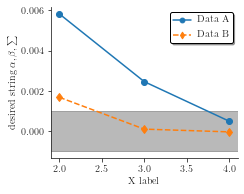

In [29]:
width_ratio = 0.5
# use some ratio to make width a bit smaller (tunable for ones needs)
fig_width = width_ratio * set_fontsize_and_get_fig_width('usletter')

# use a ratio to define the width/height ratio of the figure (tunable for ones needs)
fig_ratio = 0.8
fig_height = fig_ratio * fig_width
fig_size = (fig_width, fig_height)

# create a figure (fig) with 1 axis (ax) of the desired size (figsize)
fig, ax = plt.subplots(1, figsize = fig_size)

# plot the data
ax.plot(data_a[0], data_a[1]-ref, ls=ls[0], marker=marker[0], label='Data A')
ax.plot(data_b[0], data_b[1]-ref, ls=ls[1], marker=marker[2], label='Data B')

ax.legend()

ax.set_xlabel('X label')
# also latex math possible with "raw strings": r'desired string'
ax.set_ylabel(r'desired string $\alpha, \beta, \sum$')

# create a filled area indicating chemical accuracy (alpha controls the opacity)
ax.fill_between([1,5],y1=[-0.001,-0.001], y2=[0.001,0.001], color = 'k', alpha = 0.3)

# restrict x-axis again to the data:
ax.set_xlim([1.9,4.1])

# 'tight' layout of the figure (removes unnecessary whitespace)
fig.tight_layout()

# save in desired format:
# i like the additional: bbox_inches='tight' option (makes it even tighter)
# and the transparent=True for e.g. presentations with a different 
# background color

fig.savefig('example.pdf', bbox_inches='tight', transparent=True)